<a id='header'></a>
# Demo for performing PCA on sampled data sets

In this notebook we present how PCA can be performed on sampled data sets using various functionalities available within `preprocess` and `reduction` modules.

Those functionalities essentially allow to compare PCA done on the original full data set $\mathbf{X}$ and on the sampled data set $\mathbf{X_r}$. There are several options for how information about $\mathbf{X_r}$ can bias the PCA. Four options are implemented in `PCAfold` and they can be selected using `biasing_option` parameter.

### PCA on sampled data set

A data set representing combustion of syngas in air generated from steady laminar flamelet model is used as a demo data set. We present a workflow for performing cluster-biased PCA on that data set using available functions:

- [**Section 1**](#run_cluster_equilibration): Equilibrating cluster populations
- [**Section 2**](#centers_change): Visualizing data set centers change
- [**Section 3**](#eigenvector_weights_movement): Visualizing eigenvector weights movement
- [**Section 4**](#eigenvalue_distribution): Visualizing eigenvalue distribution
- [**Section 5**](#biased_manifold): Visualizing the biased manifold
- [**Section 6**](#generalized_sampling): Generalization of PCA on sampled data set

***

**Should plots be saved?**

In [1]:
save_plots = True

***

In [2]:
from PCAfold import preprocess
from PCAfold import reduction
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Set some initial parameters:
scal_crit = 'auto'
biasing_option = 2
n_clusters = 4
n_components = 2
title = None
save_filename = None
random_seed = 100
legend_label = ['$\mathbf{X}$', '$\mathbf{X_r}$']
state_space_names = ['$T$', '$H_2$', '$O_2$', '$O$', '$OH$', '$H_2O$', '$H$', '$HO_2$', '$CO$', '$CO_2$', '$HCO$']

# Upload the sample data set:
state_space = pd.read_csv('data-state-space.csv', sep = ',', header=None).to_numpy()

We start with clustering the data set that will result in an `idx` vector. Clustering can be performed with any technique of choice. Here we will use K-Means clustering algorithm:

In [3]:
scaler = StandardScaler()
conditioning_variable = scaler.fit_transform(state_space)
kmeans = KMeans(n_clusters=n_clusters, random_state=random_seed).fit(conditioning_variable)
idx = kmeans.labels_

***
<a id='run_cluster_equilibration'></a>
## Run cluster equilibration

[**Go up**](#header)

Notice that with `verbose=True` the function prints out the current number of samples taken from each cluster at each iteration.

In [4]:
(eigenvalues, eigenvectors, pc_scores, _, idx_train, _, _) = reduction.equilibrate_cluster_populations(state_space, idx, scaling=scal_crit, X_source=[], n_components=n_components, biasing_option=biasing_option, n_iterations=10, stop_iter=0, random_seed=random_seed, verbose=True)

Biasing is performed with option 2.

At iteration 1 taking samples:
{0: 7578, 1: 15744, 2: 18494, 3: 5308}

At iteration 2 taking samples:
{0: 7326, 1: 14585, 2: 17029, 3: 5308}

At iteration 3 taking samples:
{0: 7074, 1: 13426, 2: 15564, 3: 5308}

At iteration 4 taking samples:
{0: 6822, 1: 12267, 2: 14099, 3: 5308}

At iteration 5 taking samples:
{0: 6570, 1: 11108, 2: 12634, 3: 5308}

At iteration 6 taking samples:
{0: 6318, 1: 9949, 2: 11169, 3: 5308}

At iteration 7 taking samples:
{0: 6066, 1: 8790, 2: 9704, 3: 5308}

At iteration 8 taking samples:
{0: 5814, 1: 7631, 2: 8239, 3: 5308}

At iteration 9 taking samples:
{0: 5562, 1: 6472, 2: 6774, 3: 5308}

At iteration 10 taking samples:
{0: 5308, 1: 5308, 2: 5308, 3: 5308}


***
<a id='centers_change'></a>
## Centers change

We are going to plot the normalized centers of the original full data set $\mathbf{X}$ versus the centers of the sampled data set $\mathbf{X_r}$ using a function from the `preprocess` module.

[**Go up**](#header)

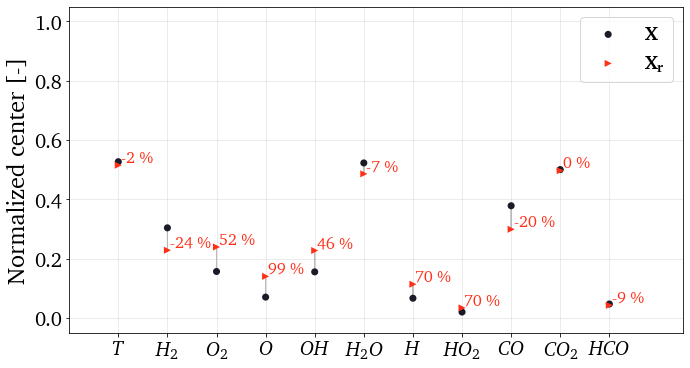

In [5]:
if save_plots: save_filename = '../images/centers-change'
(centers_X, centers_X_r, perc) = preprocess.analyze_centers_change(state_space, idx_train, variable_names=state_space_names, legend_label=legend_label, title=title, save_filename=save_filename)

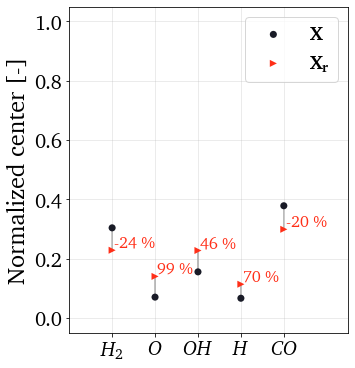

In [6]:
if save_plots: save_filename = '../images/centers-change-selected-variables'
(centers_X, centers_X_r, perc) = preprocess.analyze_centers_change(state_space, idx_train, variable_names=state_space_names, plot_variables=[1,3,4,6,8], legend_label=legend_label, title=title, save_filename=save_filename)

***
<a id='eigenvector_weights_movement'></a>
## Eigenvector weights movement

[**Go up**](#header)

We are going to plot the first eigenvector (PC-1) weights movement with three variants of normalization. To access the first eigenvector one can simply do:

```python
eigenvectors[:,0,:]
```

similarly, to access the second eigenvector:

```python
eigenvectors[:,1,:]
```

and so on.

Let's start with no normalization `normalize=False`:

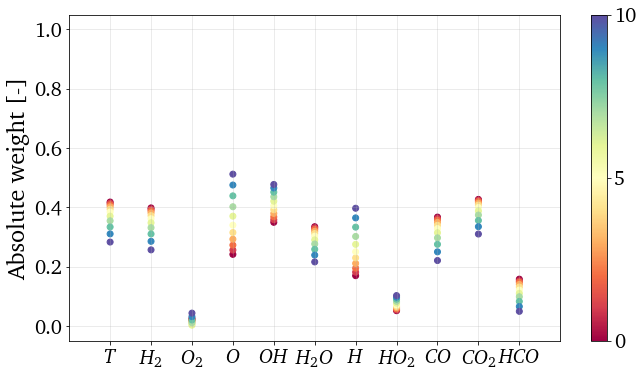

In [7]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-non-normalized'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=False, zero_norm=False, title=title, save_filename=save_filename)

Normalization with `normalize=True` and `zero_norm=False`:

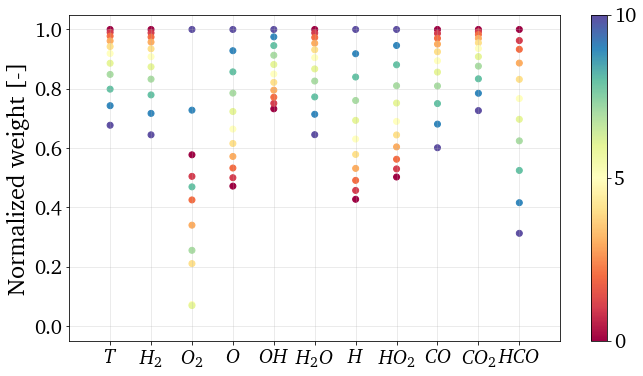

In [8]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-normalized'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=False, title=title, save_filename=save_filename)

Normalization with `normalize=True` and `zero_norm=True`:

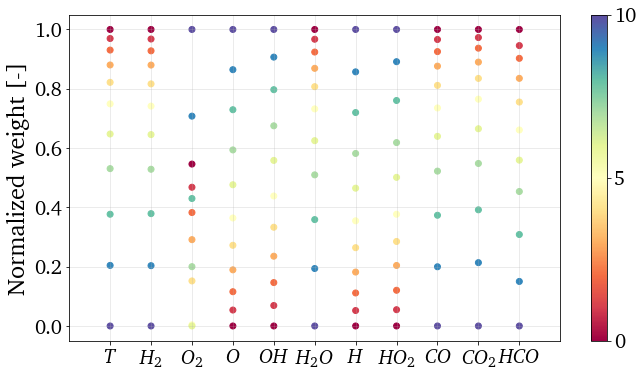

In [9]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-normalized-to-zero'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[], normalize=True, zero_norm=True, title=title, save_filename=save_filename)

Note that in the above example the color bar marks the iteration number and so the $0^{th}$ iteration represents eigenvectors from the initial data set *(as-is)*. The last iteration, in this example $10^{th}$, represents eigenvectors computed on the *equilibrated* data set.

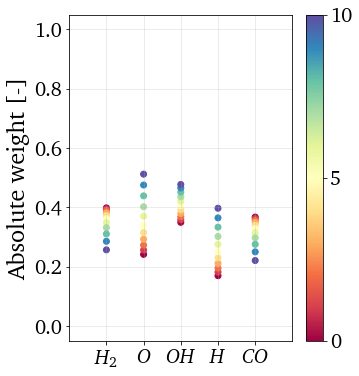

In [10]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-selected-variables'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,:], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, title=title, save_filename=save_filename)

If you are only interested in plotting the comparison in eigenvector weights change between the original data set and the sampled data set, you can set the eigenvectors input parameter to only contain these two sets of weights. The function will then understand that only these two should be compared:

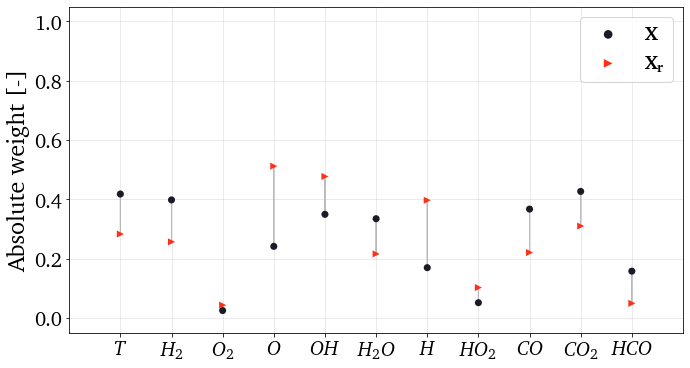

In [11]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-X-Xr'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,[0,-1]], state_space_names, normalize=False, zero_norm=False, legend_label=legend_label, title=title, save_filename=save_filename)

Such plot can be done as well for pre-selected variables:

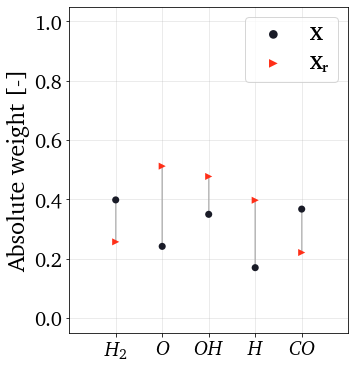

In [12]:
if save_plots: save_filename = '../images/eigenvector-weights-movement-X-Xr-selected-variables'
reduction.analyze_eigenvector_weights_movement(eigenvectors[:,0,[0,-1]], state_space_names, plot_variables=[1,3,4,6,8], normalize=False, zero_norm=False, legend_label=legend_label, title=title, save_filename=save_filename)

***
<a id='eigenvalue_distribution'></a>
## Eigenvalue distribution

[**Go up**](#header)

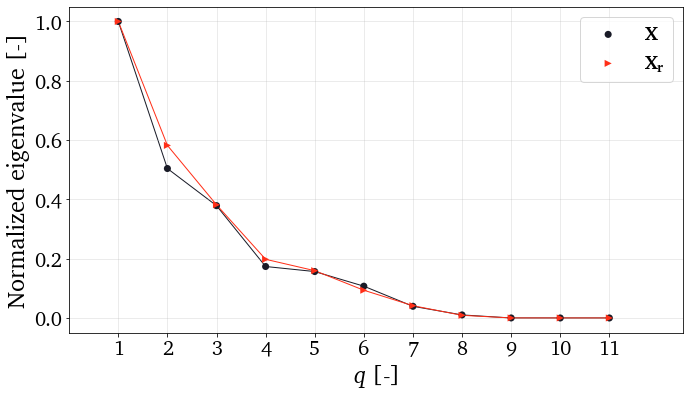

In [13]:
if save_plots: save_filename = '../images/eigenvalue-distribution'
reduction.analyze_eigenvalue_distribution(state_space, idx_train, scal_crit, biasing_option, legend_label=legend_label, title=title, save_filename=save_filename)

***
<a id='biased_manifold'></a>
## Visualize biased manifold

[**Go up**](#header)

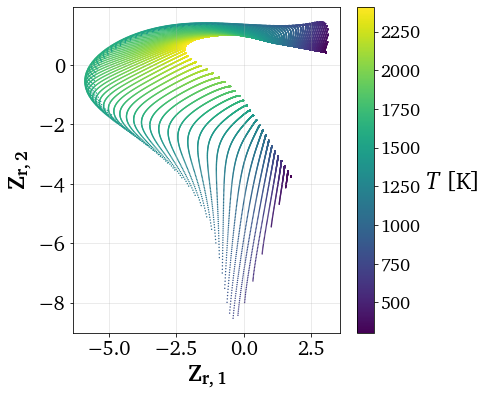

In [14]:
if save_plots: save_filename = '../images/biased-manifold'
reduction.plot_2d_manifold(pc_scores[:,:,-1], color_variable=state_space[:,0], x_label='$\mathbf{Z_{r, 1}}$', y_label='$\mathbf{Z_{r, 2}}$', colorbar_label='$T$ [K]', title=title, save_filename=save_filename)

***
<a id='generalized_sampling'></a>
## Generalization of PCA on sampled data set

[**Go up**](#header)

We will first inspect how many samples each cluster has:

In [15]:
print(preprocess.get_populations(idx))

[7830, 16903, 19959, 5308]


We begin by generating a sampling using the already identified clusters by K-Means algorithm:

In [16]:
from PCAfold import DataSampler

sample = DataSampler(idx, idx_test=[], random_seed=random_seed, verbose=True)

and perform manual sampling. Suppose that we'd like to severly under-represent the two largest clusters and over-represent the features of the two smallest clusters. Let's select 7000 samples from $k_0$, 1000 samples from $k_1$, 1000 samples from $k_2$ and 5000 samples from $k_3$:

In [17]:
(idx_manual, _) = sample.manual({0:7000, 1:1000, 2:1000, 3:5000}, sampling_type='number', test_selection_option=1)

Cluster 0: taking 7000 train samples out of 7830 observations (89.4%).
Cluster 1: taking 1000 train samples out of 16903 observations (5.9%).
Cluster 2: taking 1000 train samples out of 19959 observations (5.0%).
Cluster 3: taking 5000 train samples out of 5308 observations (94.2%).

Cluster 0: taking 830 test samples out of 830 remaining observations (100.0%).
Cluster 1: taking 15903 test samples out of 15903 remaining observations (100.0%).
Cluster 2: taking 18959 test samples out of 18959 remaining observations (100.0%).
Cluster 3: taking 308 test samples out of 308 remaining observations (100.0%).

Selected 14000 train samples (28.0%) and 36000 test samples (72.0%).



We now perform PCA on a data set that has been sampled according to ``idx_manual``:

In [18]:
(eigenvalues, eigenvectors, pc_scores, _, _, _, _, _) = reduction.pca_on_sampled_data_set(state_space, idx_manual, scal_crit, n_components, biasing_option)

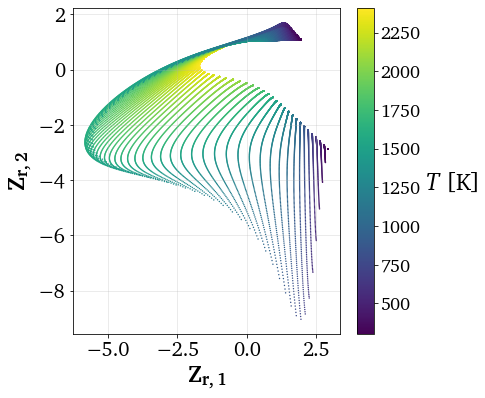

In [19]:
if save_plots: save_filename = '../images/generalize-sampling-biased-manifold'
reduction.plot_2d_manifold(pc_scores[:,0:2], color_variable=state_space[:,0], x_label='$\mathbf{Z_{r, 1}}$', y_label='$\mathbf{Z_{r, 2}}$', colorbar_label='$T$ [K]', title=title, save_filename=save_filename)